In [1]:
import numpy as np
from scipy.signal import lfilter, freqz
import matplotlib.pyplot as plt

import os; os.sys.path.append(os.path.dirname(os.path.abspath('.')))
import impulse_responses as IR


Go ahead and change the bitstream below! That's where the learning comes in.

In [2]:
# First set simulation frequencies and a bitstream
samp_rate = 100
symbol_rate = 1
bits=np.array([1,1,0,0,0,1,0,1])

In [3]:
# make them go from -1 to 1 instead of 0 to 1
bits=2*bits-1
# Repeat for square bits
square_bits=np.repeat(bits,samp_rate//symbol_rate)

When dealing with square pulses in this section of the
textbook we're not trying to learn about the Bessel filter
so it is sufficient to enforce that the output be an RC2 pulse

In [4]:
impulses = np.zeros(len(bits)*samp_rate//symbol_rate)
impulses[::samp_rate//symbol_rate]=bits
impulses=np.append(impulses,np.zeros(samp_rate//symbol_rate))
RC2_pulse, _ = IR.RC2_time_domain(symbol_rate,samp_rate)
filtered=lfilter(RC2_pulse,1,impulses)

In [5]:
# Make T arrays for each waveform
square_wave_Ts = np.arange(0,len(square_bits)/(samp_rate//symbol_rate),samp_rate**-1)
impulses_Ts= np.arange(0,len(impulses)/(samp_rate//symbol_rate),samp_rate**-1)
filtered_Ts = np.arange(0,len(filtered)/(samp_rate//symbol_rate),samp_rate**-1)

So lets clarify what's happening here. We have learned that a Bessel low-pass filter will shape a square pulse into an "approximation" of an RC2 pulse shape. I would love to show that but had a hard time making a Bessel filter so I cheated and just shoved a bunch of RC2 pulse shapes into the correct place (using the `impulses` variable whch you should ignore).  So what I'm actually plotting is input and output of the Bessel filter without actually using the proper filter.

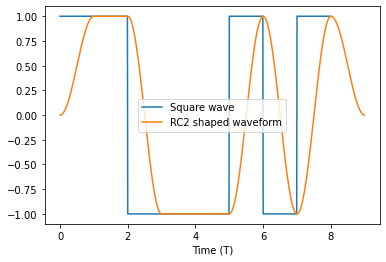

In [6]:
# Plot everything in case you're interested
plt.plot(square_wave_Ts,square_bits, label="Square wave")
# plt.plot(impulses_Ts,impulses)
plt.plot(filtered_Ts,filtered, label="RC2 shaped waveform")
plt.legend()
plt.xlabel("Time (T)")
plt.show()